### Logistic Regression (로지스틱 회귀)
- 선형 회귀 방식을 분류에 적용한 알고리즘이다.
- 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(sigmoid) 함수의 최적선을 찾고 이 함수의 반환값을 확률로 간주하여 확률에 따라 분류를 결정한다.
- 로지스틱 회귀는 다중 분류도 가능하지만, 주로 이진 분류에 활용되며, 예측 값이 예측 확률이다.
- 독립변수를 input값으로 받아 종속변수가 1이 될 확률을 결과값으로 하는 sigmoid 함수를 찾는 과정이다.
<img src="./images/sigmoid01.png" width="400" style="margin-left: 0">  

> 📌 시그모이드(sigmoid) 함수는 입력 값을 넣었을 때 1일 확률은 얼마인지 알아낼 수 있다.  
> ##### 베이지안 추론을 통한 시그모이드 식 증명  
> - B가 A<sub>1</sub> 조건에 속할 확률을 구한다.
<img src="./images/sigmoid02.png" width="250" style="margin-top: -2px; margin-bottom:20px; margin-left: -20px">  
> - 각 분자와 분모를 분자로 나눠준다.
> - 아래 로그의 성질을 이용해서 자연상수 e를 대입한다.
<img src="./images/sigmoid03.png" width="100" style="margin-bottom:20px; margin-left: 0">  
> - A/B = e<sup>-log(B/A)</sup>
> - 이를 통해 아래의 식이 나온다.
<img src="./images/sigmoid04.png" width="250" style="margin-bottom:20px; margin-left: 0">  
> - likelihood ratio(우도): 어떤 현상이 있을 때 그 현상이 어떤 모집단에 속할 가능성을 의미한다.  
> 예를 들어, '양성'판정을 받은 모집단이 있고, '암'이라는 현상이 있고, '암이 아님'이라는 현상이 있을 때 '암'이라는 현상일 때 '양성'이라는 모집단에 속할 가능성을 우도라고 한다.  
암에 걸린 사람들을 대상으로 암 진단용 시약으로 검사를 했더니 99%가 양성일 경우 우도 99%이다.
> - P(C<sub>1</sub>|x) : 조건부 확률
> - P(x|C<sub>1</sub>) : 우도
> - prior odds ratio: odds를 통해 특정 확률을 역으로 알 수 있다. 즉, 경기에서 지는 확률만 가지고 odds를 사용하여 역확률인 이기는 확률을 구할 수 있다는 의미이다. 두 가지 상황에서의 확률 중 한 가지 상황에서는 0 ~ 1사이가 나오지만, 반대 상황에서는 1 ~ 무한대가 나오므로 균형을 맞추고자 log를 씌워준다(이를 logit이라 부른다).   
logit함수는 0에서 1까지의 확률값과 -∞에서 ∞ 사이의 확률값을 표현해주는 함수이며, 시그모이드의 역함수이다.  

- 🚩 y의 범위는 [0, 1]이고, 특성값 x의 범위는 [-∞, ∞]이므로 관계를 말할 수 없지만, logit 변환은 [0, 1]의 범위를 가지는 확률을 [-∞, ∞]로 바꿔주기 때문에, 예측값(y)과 예측값을 만들어내는 특성값(x)의 관계를 선형 관계(y = wx+b)로 만들 수 있게 한다.

##### LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
- penalty: 원하는 규제를 선택한다.
- C: 서포트 벡터 머신과 마찬가지로 값이 작을수록 규제가 심해지기 때문에 더 강력한 정규화가 지정된다.
- solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'  
최적화 문제에 사용할 알고리즘을 선택할 수 있으며, 데이터 세트가 작을 경우 'liblinear'가 좋고, 큰 경우 'sag'와 'saga'가 더 좋다.  
다중 분류는 'newton-cg', 'sag', 'saga' 및 'lbfgs'만 처리 가능하다.  
사용 가능한 규제는 아래와 같다.
> - lbfgs[‘l2’, None]
> - liblinear - [‘l1’, ‘l2’]
> - newton-cg - [‘l2’, None]
> - newton-cholesky - [‘l2’, None]
> - sag - [‘l2’, None]
> - saga - [‘elasticnet’, ‘l1’, ‘l2’, None] 

In [2]:
import pandas as pd

corona_df = pd.read_csv('./datasets/corona.csv', low_memory=False)
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [3]:
corona_df = corona_df[~corona_df['Cough_symptoms'].isna()]
corona_df = corona_df[~corona_df['Fever'].isna()]
corona_df = corona_df[~corona_df['Sore_throat'].isna()]
corona_df = corona_df[~corona_df['Headache'].isna()]
corona_df['Age_60_above'] = corona_df['Age_60_above'].fillna('No')
corona_df['Sex'] = corona_df['Sex'].fillna('unknown')
corona_df.isna().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [4]:
corona_df['Target'] = corona_df['Corona']
corona_df.drop(columns='Corona', axis=1, inplace=True)
corona_df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Target
0,1,11-03-2020,True,False,True,False,False,No,unknown,Abroad,negative
1,2,11-03-2020,False,True,False,False,False,No,unknown,Abroad,positive
2,3,11-03-2020,False,True,False,False,False,No,unknown,Abroad,positive
3,4,11-03-2020,True,False,False,False,False,No,unknown,Abroad,negative
4,5,11-03-2020,True,False,False,False,False,No,unknown,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,No,male,Other,positive
278844,278845,30-04-2020,False,False,False,False,False,No,female,Other,negative
278845,278846,30-04-2020,False,False,False,False,False,No,male,Other,negative
278846,278847,30-04-2020,False,False,False,False,False,No,male,Other,negative


In [5]:
corona_df['Target'].value_counts()

Target
negative    260008
positive     14694
other         3892
Name: count, dtype: int64

In [6]:
corona_df = corona_df[corona_df['Target'] != 'other']
corona_df['Target'].value_counts()

Target
negative    260008
positive     14694
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Target']

for column in columns:
    encoder = LabelEncoder()
    targets = encoder.fit_transform(corona_df[column])
    corona_df.loc[:, column] = targets
    print(f'{column}_classes: {encoder.classes_}')

Cough_symptoms_classes: [False True]
Fever_classes: [False True]
Sore_throat_classes: [False True]
Shortness_of_breath_classes: [False True]
Headache_classes: [False True]
Age_60_above_classes: ['No' 'Yes']
Target_classes: ['negative' 'positive']


In [8]:
corona_df = corona_df.drop(columns=['Ind_ID', 'Test_date', 'Sex', 'Known_contact'], axis=1)
corona_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Target
0,1,0,1,0,0,0,0
1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1
278844,0,0,0,0,0,0,0
278845,0,0,0,0,0,0,0
278846,0,0,0,0,0,0,0


In [9]:
corona_df = corona_df.reset_index(drop=True)
corona_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Target
0,1,0,1,0,0,0,0
1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
274697,0,0,0,0,0,0,1
274698,0,0,0,0,0,0,0
274699,0,0,0,0,0,0,0
274700,0,0,0,0,0,0,0


In [10]:
# 각 카테고리 값을 정수 타입으로 변환 !
corona_df = corona_df.astype('int16')
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274702 entries, 0 to 274701
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       274702 non-null  int16
 1   Fever                274702 non-null  int16
 2   Sore_throat          274702 non-null  int16
 3   Shortness_of_breath  274702 non-null  int16
 4   Headache             274702 non-null  int16
 5   Age_60_above         274702 non-null  int16
 6   Target               274702 non-null  int16
dtypes: int16(7)
memory usage: 3.7 MB


In [11]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

features, targets = corona_df.iloc[:,:-1], corona_df.Target

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=124)

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)
lg.fit(X_train_over, y_train_over)
prediction = lg.predict(X_test)

오차 행렬
[[66258 11745]
 [ 1590  2818]]
정확도: 0.8382, 정밀도: 0.1935, 재현율: 0.6393, F1:0.2971, AUC:0.7444
###########################################################################


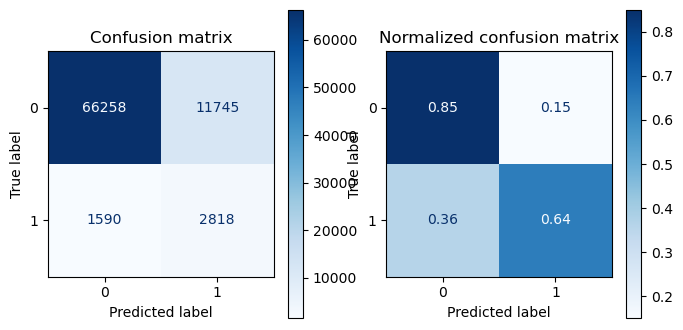

In [13]:
get_evaluation(y_test, prediction, lg, X_test)

In [14]:
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임계값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [15]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction = lg.predict(X_test)
prediction_proba = lg.predict_proba(X_test)[:, 1].reshape(-1, 1)
precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba)

get_evaluation_by_thresholds(y_test, prediction_proba, thresholds)

임계값: 0.30236832394477575
오차 행렬
[[60176 17827]
 [ 1386  3022]]
정확도: 0.7669, 정밀도: 0.1449, 재현율: 0.6856, F1:0.2393, AUC:0.7285
###########################################################################
임계값: 0.4013123574384932
오차 행렬
[[66258 11745]
 [ 1590  2818]]
정확도: 0.8382, 정밀도: 0.1935, 재현율: 0.6393, F1:0.2971, AUC:0.7444
###########################################################################
임계값: 0.5443577256087347
오차 행렬
[[72608  5395]
 [ 2126  2282]]
정확도: 0.9087, 정밀도: 0.2973, 재현율: 0.5177, F1:0.3777, AUC:0.7243
###########################################################################
임계값: 0.6488399698426035
오차 행렬
[[73140  4863]
 [ 2199  2209]]
정확도: 0.9143, 정밀도: 0.3124, 재현율: 0.5011, F1:0.3848, AUC:0.7194
###########################################################################
임계값: 0.6674292650737955
오차 행렬
[[74224  3779]
 [ 2512  1896]]
정확도: 0.9237, 정밀도: 0.3341, 재현율: 0.4301, F1:0.3761, AUC:0.6908
###########################################################################
임계값: 0.75

오차 행렬
[[77985    18]
 [ 4214   194]]
정확도: 0.9486, 정밀도: 0.9151, 재현율: 0.0440, F1:0.0840, AUC:0.5219
###########################################################################
임계값: 0.9998124209389336
오차 행렬
[[77989    14]
 [ 4259   149]]
정확도: 0.9482, 정밀도: 0.9141, 재현율: 0.0338, F1:0.0652, AUC:0.5168
###########################################################################
임계값: 0.9998193122981356
오차 행렬
[[77989    14]
 [ 4266   142]]
정확도: 0.9481, 정밀도: 0.9103, 재현율: 0.0322, F1:0.0622, AUC:0.5160
###########################################################################
임계값: 0.999833729386184
오차 행렬
[[77989    14]
 [ 4272   136]]
정확도: 0.9480, 정밀도: 0.9067, 재현율: 0.0309, F1:0.0597, AUC:0.5153
###########################################################################
임계값: 0.9998787055272009
오차 행렬
[[77989    14]
 [ 4275   133]]
정확도: 0.9480, 정밀도: 0.9048, 재현율: 0.0302, F1:0.0584, AUC:0.5150
###########################################################################
임계값: 0.9998883248635461
오차 행렬
[[779

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[73140  4863]
 [ 2199  2209]]
정확도: 0.9143, 정밀도: 0.3124, 재현율: 0.5011, F1:0.3848, AUC:0.7194
###########################################################################


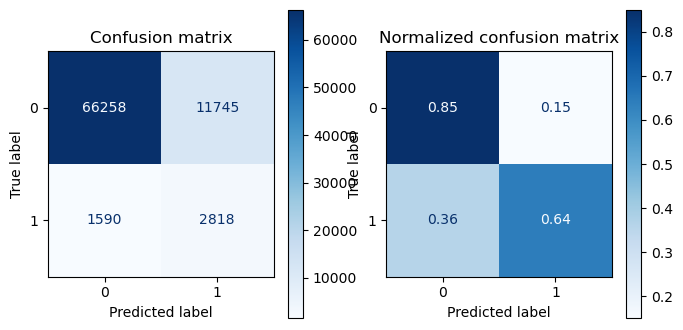

In [16]:
prediction = Binarizer(threshold=0.6488399698426035).fit_transform(prediction_proba)
get_evaluation(y_test, prediction, lg, X_test)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

params = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear', 'saga']}

features, targets = corona_df.iloc[:,:-1], corona_df.Target

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, random_state=124)

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

grid_lg = GridSearchCV(LogisticRegression(max_iter=1000, penalty='l2', random_state=124), param_grid=params, cv=3, refit=True)
grid_lg.fit(X_train_over, y_train_over)
prediction = grid_lg.predict(X_test)

In [18]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_lg.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.001, 'solver': 'lbfgs'}",0.744699,1,0.744431,0.745684,0.743984
1,"{'C': 0.001, 'solver': 'liblinear'}",0.744699,1,0.744431,0.745684,0.743984
2,"{'C': 0.001, 'solver': 'saga'}",0.744699,1,0.744431,0.745684,0.743984
3,"{'C': 0.01, 'solver': 'lbfgs'}",0.744699,1,0.744431,0.745684,0.743984
4,"{'C': 0.01, 'solver': 'liblinear'}",0.744699,1,0.744431,0.745684,0.743984
5,"{'C': 0.01, 'solver': 'saga'}",0.744699,1,0.744431,0.745684,0.743984
6,"{'C': 0.1, 'solver': 'lbfgs'}",0.744699,1,0.744431,0.745684,0.743984
7,"{'C': 0.1, 'solver': 'liblinear'}",0.744699,1,0.744431,0.745684,0.743984
8,"{'C': 0.1, 'solver': 'saga'}",0.744699,1,0.744431,0.745684,0.743984
9,"{'C': 1, 'solver': 'lbfgs'}",0.744699,1,0.744431,0.745684,0.743984


오차 행렬
[[66258 11745]
 [ 1590  2818]]
정확도: 0.8382, 정밀도: 0.1935, 재현율: 0.6393, F1:0.2971, AUC:0.7444
###########################################################################


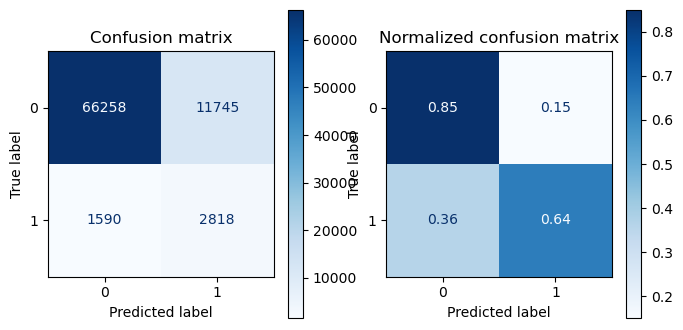

In [19]:
get_evaluation(y_test, prediction, grid_lg, X_test)

In [20]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction = grid_lg.predict(X_test)
prediction_proba = grid_lg.predict_proba(X_test)[:, 1].reshape(-1, 1)
precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba)

get_evaluation_by_thresholds(y_test, prediction_proba, thresholds)

임계값: 0.3211996564612814
오차 행렬
[[60176 17827]
 [ 1386  3022]]
정확도: 0.7669, 정밀도: 0.1449, 재현율: 0.6856, F1:0.2393, AUC:0.7285
###########################################################################
임계값: 0.4113470122638784
오차 행렬
[[66258 11745]
 [ 1590  2818]]
정확도: 0.8382, 정밀도: 0.1935, 재현율: 0.6393, F1:0.2971, AUC:0.7444
###########################################################################
임계값: 0.5615485525981336
오차 행렬
[[72608  5395]
 [ 2126  2282]]
정확도: 0.9087, 정밀도: 0.2973, 재현율: 0.5177, F1:0.3777, AUC:0.7243
###########################################################################
임계값: 0.6056696818479924
오차 행렬
[[72647  5356]
 [ 2159  2249]]
정확도: 0.9088, 정밀도: 0.2957, 재현율: 0.5102, F1:0.3744, AUC:0.7208
###########################################################################
임계값: 0.6541459441734264
오차 행렬
[[73179  4824]
 [ 2232  2176]]
정확도: 0.9144, 정밀도: 0.3109, 재현율: 0.4936, F1:0.3815, AUC:0.7159
###########################################################################
임계값: 0.660

오차 행렬
[[77987    16]
 [ 4231   177]]
정확도: 0.9485, 정밀도: 0.9171, 재현율: 0.0402, F1:0.0769, AUC:0.5200
###########################################################################
임계값: 0.9808726083249641
오차 행렬
[[77987    16]
 [ 4255   153]]
정확도: 0.9482, 정밀도: 0.9053, 재현율: 0.0347, F1:0.0669, AUC:0.5173
###########################################################################
임계값: 0.9820964462311649
오차 행렬
[[77987    16]
 [ 4258   150]]
정확도: 0.9481, 정밀도: 0.9036, 재현율: 0.0340, F1:0.0656, AUC:0.5169
###########################################################################
임계값: 0.9825499170692362
오차 행렬
[[77987    16]
 [ 4272   136]]
정확도: 0.9480, 정밀도: 0.8947, 재현율: 0.0309, F1:0.0596, AUC:0.5153
###########################################################################
임계값: 0.9868177820687755
오차 행렬
[[77991    12]
 [ 4284   124]]
정확도: 0.9479, 정밀도: 0.9118, 재현율: 0.0281, F1:0.0546, AUC:0.5140
###########################################################################
임계값: 0.9881167520720814
오차 행렬
[[77

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[73179  4824]
 [ 2232  2176]]
정확도: 0.9144, 정밀도: 0.3109, 재현율: 0.4936, F1:0.3815, AUC:0.7159
###########################################################################


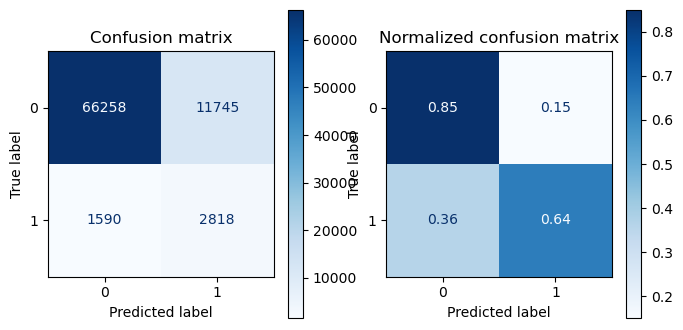

In [21]:
prediction = Binarizer(threshold=0.6541459441734264).fit_transform(prediction_proba)
get_evaluation(y_test, prediction, grid_lg, X_test)